In [325]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True) 
import plotly.express as px
from plotly.subplots import make_subplots
# For offline use
cf.go_offline()
plt.rcParams["figure.figsize"] = (24, 12)

In [254]:
#Data source: https://github.com/owid/covid-19-data/tree/master/public/data/
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="iso_code", parse_dates=['date'])
df

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,Africa,Zimbabwe,2021-08-16,120088.0,0.0,462.143,4109.0,0.0,27.143,8079.701,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
ZWE,Africa,Zimbabwe,2021-08-17,121046.0,958.0,541.143,4156.0,47.0,29.429,8144.156,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
ZWE,Africa,Zimbabwe,2021-08-18,121498.0,452.0,506.286,4181.0,25.0,27.143,8174.567,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


<br><h3>Deleting rows with data already provided about continents</h3>

In [153]:
filt = df.index.str.startswith("OWID")
df[filt]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
iso_code,,,,,,,,,,,,,,,,,,,,,
OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OWID_WRL,NaN,World,2021-08-16,207937090.0,669730.0,649839.714,4371437.0,9464.0,9766.286,26676.390,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
OWID_WRL,NaN,World,2021-08-17,208595814.0,658724.0,653358.143,4382152.0,10715.0,9655.571,26760.898,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
OWID_WRL,NaN,World,2021-08-18,209303369.0,707555.0,653443.571,4392963.0,10811.0,9777.714,26851.671,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN


In [154]:
iso_code_labels = df[filt].index.unique()
iso_code_labels

Index(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_INT', 'OWID_KOS',
       'OWID_NAM', 'OWID_CYN', 'OWID_OCE', 'OWID_SAM', 'OWID_WRL'],
      dtype='object', name='iso_code')

In [155]:
df.drop(iso_code_labels, inplace=True)
for iso_code in df.index.unique():
    print(iso_code)
#Getting rid of OWID_ rows

AFG
ALB
DZA
AND
AGO
AIA
ATG
ARG
ARM
ABW
AUS
AUT
AZE
BHS
BHR
BGD
BRB
BLR
BEL
BLZ
BEN
BMU
BTN
BOL
BES
BIH
BWA
BRA
VGB
BRN
BGR
BFA
BDI
KHM
CMR
CAN
CPV
CYM
CAF
TCD
CHL
CHN
COL
COM
COG
COK
CRI
CIV
HRV
CUB
CUW
CYP
CZE
COD
DNK
DJI
DMA
DOM
ECU
EGY
SLV
GNQ
ERI
EST
SWZ
ETH
FRO
FLK
FJI
FIN
FRA
PYF
GAB
GMB
GEO
DEU
GHA
GIB
GRC
GRL
GRD
GTM
GGY
GIN
GNB
GUY
HTI
HND
HKG
HUN
ISL
IND
IDN
IRN
IRQ
IRL
IMN
ISR
ITA
JAM
JPN
JEY
JOR
KAZ
KEN
KIR
KWT
KGZ
LAO
LVA
LBN
LSO
LBR
LBY
LIE
LTU
LUX
MAC
MDG
MWI
MYS
MDV
MLI
MLT
MHL
MRT
MUS
MEX
FSM
MDA
MCO
MNG
MNE
MSR
MAR
MOZ
MMR
NAM
NRU
NPL
NLD
NCL
NZL
NIC
NER
NGA
NIU
MKD
NOR
OMN
PAK
PSE
PAN
PNG
PRY
PER
PHL
PCN
POL
PRT
QAT
ROU
RUS
RWA
SHN
KNA
LCA
VCT
WSM
SMR
STP
SAU
SEN
SRB
SYC
SLE
SGP
SXM
SVK
SVN
SLB
SOM
ZAF
KOR
SSD
ESP
LKA
SDN
SUR
SWE
CHE
SYR
TWN
TJK
TZA
THA
TLS
TGO
TKL
TON
TTO
TUN
TUR
TKM
TCA
TUV
UGA
UKR
ARE
GBR
USA
URY
UZB
VUT
VAT
VEN
VNM
WLF
YEM
ZMB
ZWE


<br>
<h1>Total cases and deaths by continent:</h1>

In [302]:
continents = df.groupby("continent")
results_by_cont = continents[['new_cases', 'new_deaths']].sum().reset_index() 
results_by_cont.columns = ["Continent", "Total Cases", "Total Deaths"]
results_by_cont

,Continent,Total Cases,Total Deaths
0,Africa,7449639.0,187874.0
1,Asia,66508872.0,991909.0
2,Europe,54691908.0,1160553.0
3,North America,45125018.0,954403.0
4,Oceania,107074.0,1629.0
5,South America,36505185.0,1110066.0


<br>
<h1>Displaying data</h1>

In [304]:
px.bar(results_by_cont, x="Continent", y="Total Cases", color="Continent", title="Cases by continent")

In [308]:
px.bar(results_by_cont, x="Continent", y="Total Deaths", color="Continent", title="Deaths by continent")

In [160]:
by_country = df.groupby("iso_code", sort=False)
cases_by_country = by_country['total_cases'].max().fillna(0)
deaths_by_country = by_country['total_deaths'].max().fillna(0)

In [274]:
cases_data = dict(
        type = 'choropleth',
        colorscale = 'viridis',
        locations = cases_by_country.index,
        locationmode = 'ISO-3',
        z = cases_by_country,
        text = df['location'].unique(),
        colorbar = {'title' : 'Cases'},
      ) 

deaths_data = dict(
        type = 'choropleth',
        colorscale = 'plasma',
        locations = deaths_by_country.index,
        locationmode = 'ISO-3',
        z = deaths_by_country,
        text = df['location'].unique(),
        colorbar = {'title' : 'Deaths'},
      ) 

In [283]:
cases_layout = dict(
    title = 'Total cases by country',
    title_x=0.5,
     width=400,
    height=600,
    geo=dict(
        scope="world",
        showframe = False,
        showocean = True, oceancolor = 'LightBlue',
        showlakes = True, lakecolor = 'cornflowerblue',
        showrivers = True, rivercolor = 'cornflowerblue',
        projection = {'type':'mercator'} ))

deaths_layout = dict(
    title = 'Total deaths by country',
    title_x=0.5,
    width=400,
    height=600,
    geo=dict(
        scope="world",
        showframe = False,
        showocean = True, oceancolor = 'LightBlue',
        showlakes = True, lakecolor = 'cornflowerblue',
        showrivers = True, rivercolor = 'cornflowerblue',
        projection = {'type':'mercator'} ))

In [286]:
choromap = go.Figure(data = [cases_data],layout = cases_layout)
iplot(choromap,validate=False)
choromap = go.Figure(data = [deaths_data],layout = deaths_layout)
iplot(choromap,validate=False)

<br>
<h1>Plotting cases and deaths over time</h1>

In [316]:
byCont_and_date = df.groupby(["continent", "date"]).sum().reset_index()
byCont_and_date.rename(columns={"date": "Date", 
                                "total_cases": "Total Cases", 
                                "total_deaths": "Total Deaths", 
                                "continent": "Continent"}
                       ,inplace=True)
byCont_and_date

,Continent,Date,Total Cases,new_cases,new_cases_smoothed,Total Deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,Africa,2020-02-07,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,19.9,619.526,12.66,8.9,80.3,43.993,3.42,140.81,1.395,0.0
1,Africa,2020-02-08,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,19.9,619.526,12.66,8.9,80.3,43.993,3.42,140.81,1.395,0.0
2,Africa,2020-02-09,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,19.9,619.526,12.66,8.9,80.3,43.993,3.42,140.81,1.395,0.0
3,Africa,2020-02-10,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,19.9,619.526,12.66,8.9,80.3,43.993,3.42,140.81,1.395,0.0
4,Africa,2020-02-11,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,19.9,619.526,12.66,8.9,80.3,43.993,3.42,140.81,1.395,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,South America,2021-08-16,36288102.0,23173.0,45375.999,1112582.0,698.0,1327.571,784534.358,427.223,...,25.8,2247.887,93.73,98.4,197.3,395.944,24.82,901.09,9.158,0.0
3498,South America,2021-08-17,36341410.0,53308.0,45141.570,1114326.0,1744.0,1327.715,785610.426,1076.066,...,25.8,2247.887,93.73,98.4,197.3,395.944,24.82,901.09,9.158,0.0
3499,South America,2021-08-18,36400266.0,58856.0,45876.573,1115929.0,1603.0,1330.714,786665.778,1055.353,...,25.8,2247.887,93.73,98.4,197.3,395.944,24.82,901.09,9.158,0.0
3500,South America,2021-08-19,36456176.0,55910.0,44621.858,1117507.0,1578.0,1304.286,787674.074,1008.295,...,25.8,2247.887,93.73,98.4,197.3,395.944,24.82,901.09,9.158,0.0


In [320]:
px.line(byCont_and_date, x="Date", y="Total Cases", color="Continent", title="Cases by continent")

In [321]:
px.line(byCont_and_date, x="Date", y="Total Deaths", color="Continent", title="Deaths by continent")

In [165]:
#Check for NaNs before calculating cumulative because when we go to plot data later it won't have any value for that date
df[(df['new_cases'].isna()) | (df['new_deaths'].isna())]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZMB,Africa,Zambia,2020-03-31,35.0,0.0,4.571,NaN,NaN,0.0,1.904,...,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584,NaN
ZMB,Africa,Zambia,2020-04-01,36.0,1.0,3.429,NaN,NaN,0.0,1.958,...,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584,NaN
ZWE,Africa,Zimbabwe,2020-03-20,1.0,1.0,NaN,NaN,NaN,NaN,0.067,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [166]:
#Replacing NaN values with zero
df_clean_nan = df
df_clean_nan[['new_cases', 'new_deaths']] = df_clean_nan[['new_cases', 'new_deaths']].fillna(0)

#Check we've done it correctly, so scan df_clean_nan for any NaNs in new_cases or new_deaths
df_clean_nan[(df_clean_nan['new_cases'].isna()) | (df_clean_nan['new_deaths'].isna())]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
iso_code,,,,,,,,,,,,,,,,,,,,,


In [167]:
#We have to groupby twice, the first time so we get the new_cases combined by countries in the same continent for each day
continents = df_clean_nan.groupby(["continent", "date"]).sum()
#Then we groupby again so we can get the cumulative sum for EACH individual continent   
df_cum = continents.groupby(level=0).cumsum() 
cases_cum = df_cum['new_cases'].rename("Cumulative cases")
deaths_cum = df_cum['new_deaths'].rename("Cumulative deaths")

In [168]:
#Checking that we've done it correctly by comparing it with the column 'total cases' and 'total deaths' 
#which already provide the cumulative number
pd.concat([cases_cum['North America'], continents.loc['North America']['total_cases']], axis=1)

,Cumulative cases,total_cases
date,,
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0
2020-01-05,0.0,0.0
...,...,...
2021-08-16,44217903.0,44217904.0
2021-08-17,44382630.0,44382631.0
2021-08-18,44572966.0,44572967.0


In [169]:
pd.concat([deaths_cum['Asia'], continents.loc['Asia', 'total_deaths']], axis=1).head(50)

,Cumulative deaths,total_deaths
date,,
2020-01-04,0.0,0.0
2020-01-05,0.0,0.0
2020-01-06,0.0,0.0
2020-01-07,0.0,0.0
2020-01-08,0.0,0.0
2020-01-09,0.0,0.0
2020-01-10,0.0,0.0
2020-01-11,0.0,0.0
2020-01-12,0.0,0.0


<br>
<i><h3>As you can see the results have slight variation. This is due to the data provided by some countries being slightly inaccurate. For example, at the start there were zero cases of corona virus in the continent Asia as shown below, and then all of a sudden on the date '2020-01-22' China reports 'total cases: 548' but the 'new_cases' column is still at 0</h3></i>

In [170]:
df_clean_nan[(df_clean_nan['continent'] == "Asia")].sort_values(by='date'
                                                               ).head(30)[['date', 'location', 'total_cases', 'new_cases']]

,date,location,total_cases,new_cases
iso_code,,,,
THA,2020-01-04,Thailand,NaN,0.0
THA,2020-01-05,Thailand,NaN,0.0
THA,2020-01-06,Thailand,NaN,0.0
THA,2020-01-07,Thailand,NaN,0.0
THA,2020-01-08,Thailand,NaN,0.0
THA,2020-01-09,Thailand,NaN,0.0
THA,2020-01-10,Thailand,NaN,0.0
THA,2020-01-11,Thailand,NaN,0.0
THA,2020-01-12,Thailand,NaN,0.0


<br>
<h1>Plotting data</h1>

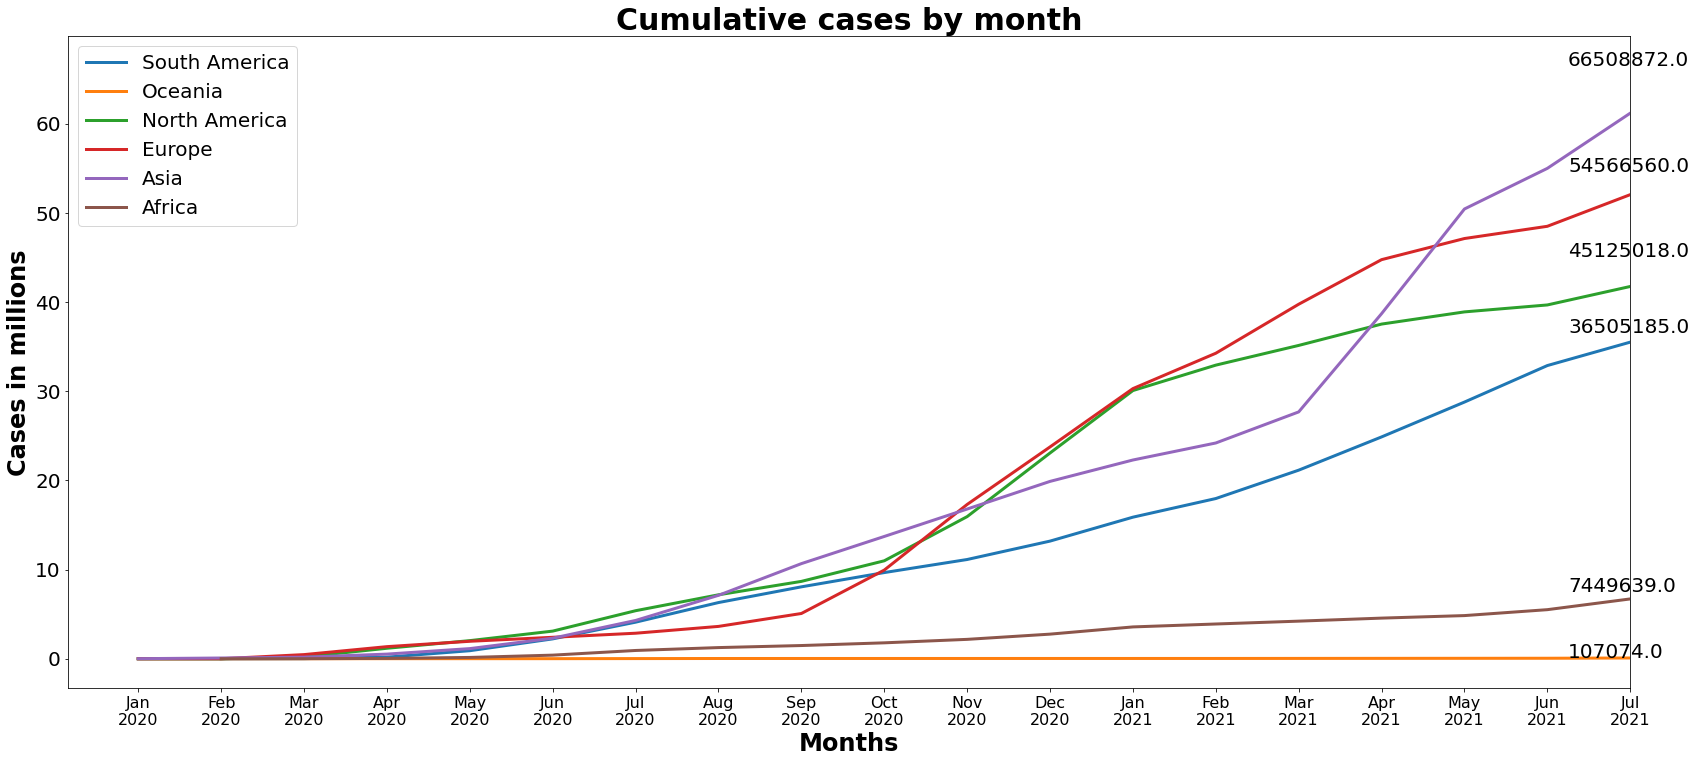

In [171]:
colours = ["#fcba03", "#f8fc03", "#1940ff", "#00ff2a", "#e81b00", "#8b00e8"]
y_ticks = range(0, int(70e6), int(10e6)) #From 0 to 60 million in steps of 10 million
y_labels = [0, 10, 20, 30, 40, 50, 60]
plt.figure(figsize=(28,12))
plt.xlim(-0.8500000000000001, 18)

for continent in continent_labels.sort_values(ascending=False): #Reversed the order to fix the x-axis not starting at Jan 2020
    series = cases_cum[continent].resample("M").max() #Sample it into frequencies of months
    dates = series.index.strftime("%b%n%Y") #Get the dates and convert them from number to month name abbreviated 
    total_cum_cases = cases_cum[continent].max() #Total sum of cases at the current time when this script is executed
    plt.plot(dates, series.values, label=continent, linewidth=3)
    plt.text(17.25, total_cum_cases, total_cum_cases, fontsize=20)

plt.title("Cumulative cases by month", {"fontsize": "30", "fontweight": "bold"})
plt.ylabel("Cases in millions", {"fontsize": "24", "fontweight": "bold"})
plt.xlabel("Months", {"fontsize": "24", "fontweight": "bold"})
plt.xticks(fontsize=16) 
plt.yticks(ticks=y_ticks, labels=y_labels, fontsize=20)
plt.rcParams["axes.spines.right"] = False #Get rid of the right border
plt.legend(loc="upper left", fontsize=20)

plt.show()

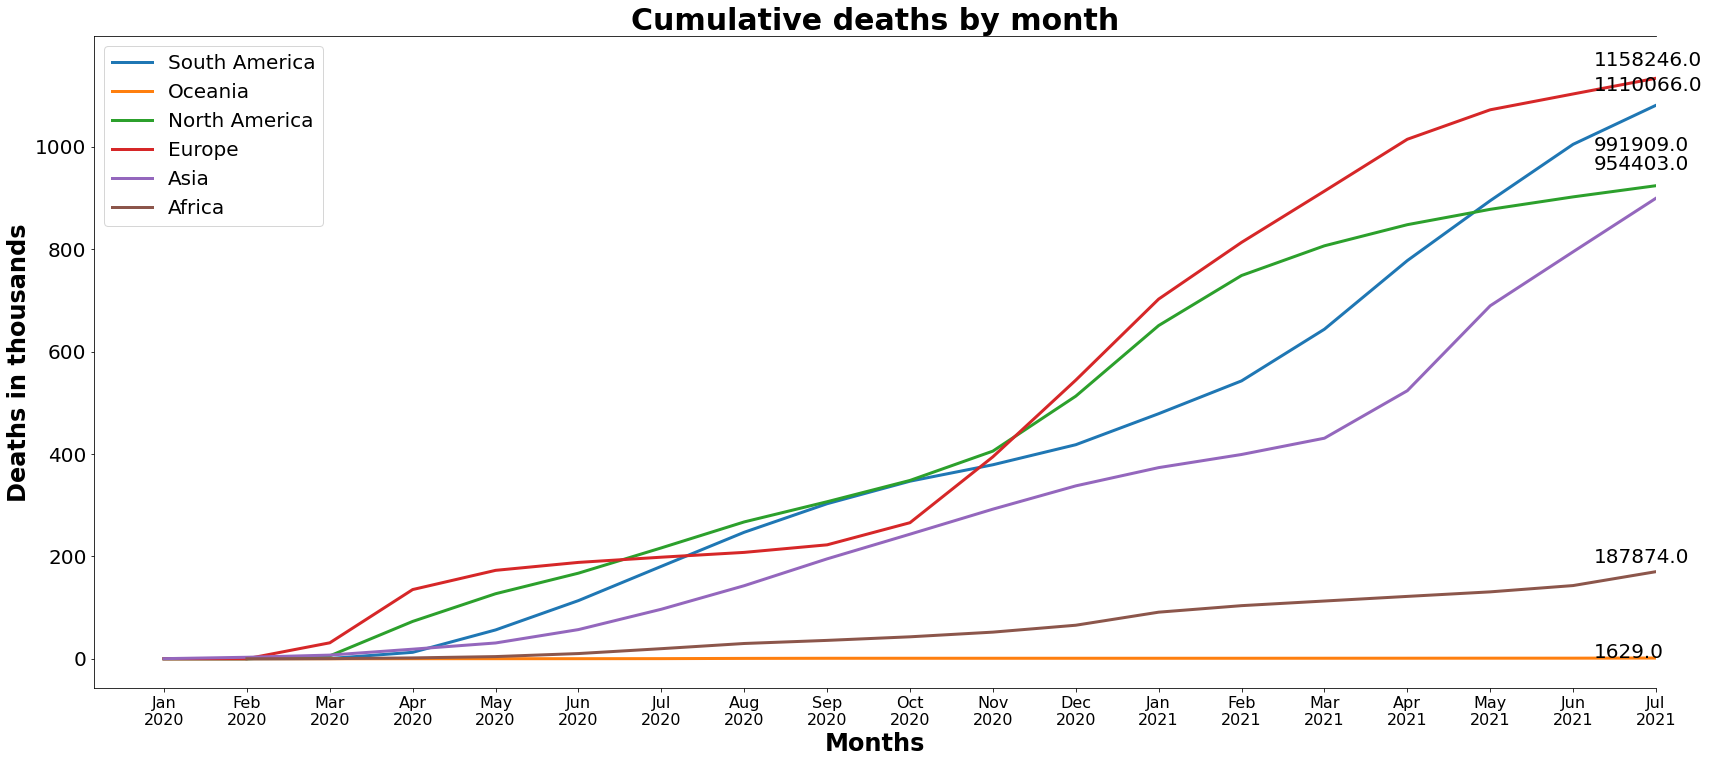

In [172]:
colours = ["#fcba03", "#f8fc03", "#1940ff", "#00ff2a", "#e81b00", "#8b00e8"]
y_ticks = range(0, int(1.2e6), int(2e5)) #From 0 to 1 million in steps of 200 000
y_labels = [0, 200, 400, 600, 800, 1000]
plt.figure(figsize=(28,12))
plt.xlim(-0.8500000000000001, 18)
for continent in continent_labels.sort_values(ascending=False): #Reversed the order to fix the x-axis not starting at Jan 2020
    series = deaths_cum[continent].resample("M").max() #Sample it into frequencies of months
    dates = series.index.strftime("%b%n%Y") #Get the dates and convert them from number to month name abbreviated 
    total_cum_deaths = deaths_cum[continent].max() #Total sum of deaths at the current time when this script is executed
    plt.plot(dates, series.values, label=continent, linewidth=3)
    plt.text(17.25, total_cum_deaths, total_cum_deaths, fontsize=20)

plt.title("Cumulative deaths by month", {"fontsize": "30", "fontweight": "bold"})
plt.ylabel("Deaths in thousands", {"fontsize": "24", "fontweight": "bold"})
plt.xlabel("Months", {"fontsize": "24", "fontweight": "bold"})
plt.xticks(fontsize=16) 
plt.yticks(ticks=y_ticks, labels=y_labels, fontsize=20)
plt.rcParams["axes.spines.right"] = False #Get rid of the right border
plt.legend(loc="upper left", fontsize=20)

plt.show()


<br>
<br>
<h1>Calculating total vaccinations over the whole world and comparing it to cases and R rate</h1>

<br>
<h4>As you can see below, again the data is inaccurate when looking at new_vaccinations and then seeing the total_vaccinations 
make a massive jump from nowhere</h4>

In [173]:
df[df['location'] == "Yemen"][['date', 'new_vaccinations']].tail(20)

,date,new_vaccinations
iso_code,,
YEM,2021-08-01,NaN
YEM,2021-08-02,NaN
YEM,2021-08-03,NaN
YEM,2021-08-04,NaN
YEM,2021-08-05,NaN
YEM,2021-08-06,NaN
YEM,2021-08-07,NaN
YEM,2021-08-08,NaN
YEM,2021-08-09,NaN


In [174]:
df[df['location'] == "Yemen"][['date', 'total_vaccinations']].tail(20)

,date,total_vaccinations
iso_code,,
YEM,2021-08-01,NaN
YEM,2021-08-02,NaN
YEM,2021-08-03,NaN
YEM,2021-08-04,NaN
YEM,2021-08-05,NaN
YEM,2021-08-06,NaN
YEM,2021-08-07,NaN
YEM,2021-08-08,NaN
YEM,2021-08-09,NaN


In [175]:
summing_up_vaccinations = df.groupby("location")['new_vaccinations'].sum().rename("Total vaccinations").to_frame()
summing_up_vaccinations

,Total vaccinations
location,
Afghanistan,6874.0
Albania,885755.0
Algeria,30.0
Andorra,4802.0
Angola,0.0
...,...
Vietnam,15606045.0
Wallis and Futuna,0.0
Yemen,0.0


In [176]:
total_vaccinations = df.groupby("location")['total_vaccinations'].max().to_frame()
total_vaccinations

,total_vaccinations
location,
Afghanistan,1809517.0
Albania,1340339.0
Algeria,4146091.0
Andorra,91660.0
Angola,1754073.0
...,...
Vietnam,16306199.0
Wallis and Futuna,9534.0
Yemen,311483.0


In [177]:
summing_up_vaccinations.loc['United Kingdom']

Total vaccinations    86170662.0
Name: United Kingdom, dtype: float64

In [178]:
total_vaccinations.loc['United Kingdom']

total_vaccinations    88848633.0
Name: United Kingdom, dtype: float64

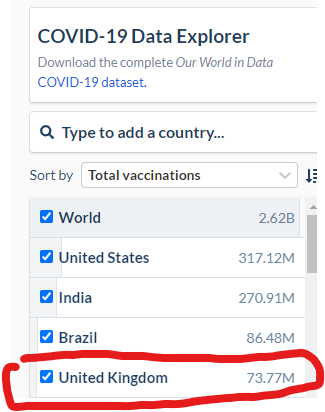

<h4>Therefore, for the following analysis I will just use the total_vaccinations column as it is more reliable as seen above</h4>

In [179]:
total_vacs_by_country = df[df['location'] == "Zimbabwe"][['date', 'total_vaccinations']]
total_vacs_by_country.tail(30)

,date,total_vaccinations
iso_code,,
ZWE,2021-07-22,2016810.0
ZWE,2021-07-23,2116373.0
ZWE,2021-07-24,NaN
ZWE,2021-07-25,2178418.0
ZWE,2021-07-26,2178418.0
ZWE,2021-07-27,2275145.0
ZWE,2021-07-28,2323763.0
ZWE,2021-07-29,2375090.0
ZWE,2021-07-30,2413238.0


In [180]:
#Since this is supposed to be a cumulative sum there should not be any NaN values. 
#'ffil' method fills NaN values with the previous most recent valid observation
countries = df.groupby("location").ffill()

In [181]:
total_cases_by_day = countries.groupby("date")['total_cases'].sum()
total_cases_by_month = total_cases_by_day.resample("M").max()
total_cases_by_month.index = total_cases_by_month.index.strftime("%b%n%Y") #Change the dates to month name abbreviated and year
total_cases_by_month

date
Jan\n2020         9927.0
Feb\n2020        85309.0
Mar\n2020       875693.0
Apr\n2020      3280674.0
May\n2020      6186477.0
Jun\n2020     10454400.0
Jul\n2020     17595776.0
Aug\n2020     25494896.0
Sep\n2020     33997092.0
Oct\n2020     46123257.0
Nov\n2020     63371925.0
Dec\n2020     83531672.0
Jan\n2021    102968753.0
Feb\n2021    114112816.0
Mar\n2021    128811385.0
Apr\n2021    151299949.0
May\n2021    170624255.0
Jun\n2021    182095875.0
Jul\n2021    197765480.0
Aug\n2021    210737463.0
Name: total_cases, dtype: float64

In [182]:
total_deaths_by_day = countries.groupby("date")['total_deaths'].sum()
total_deaths_by_month = total_deaths_by_day.resample("M").max()
total_deaths_by_month.index = total_deaths_by_month.index.strftime("%b%n%Y") #Change the dates to month name abbreviated and year
total_deaths_by_month

date
Jan\n2020        213.0
Feb\n2020       2936.0
Mar\n2020      44617.0
Apr\n2020     241067.0
May\n2020     391094.0
Jun\n2020     536206.0
Jul\n2020     712066.0
Aug\n2020     895264.0
Sep\n2020    1063884.0
Oct\n2020    1247942.0
Nov\n2020    1523955.0
Dec\n2020    1879121.0
Jan\n2021    2297143.0
Feb\n2021    2608076.0
Mar\n2021    2908086.0
Apr\n2021    3286386.0
May\n2021    3665724.0
Jun\n2021    3948838.0
Jul\n2021    4218436.0
Aug\n2021    4412930.0
Name: total_deaths, dtype: float64

In [183]:
total_vacs_by_day = countries.groupby("date")['total_vaccinations'].sum()
total_vacs_by_month = total_vacs_by_day.resample("M").max()
total_vacs_by_month.index = total_vacs_by_month.index.strftime("%b%n%Y") #Change the dates to month name abbreviated and year
total_vacs_by_month

date
Jan\n2020    0.000000e+00
Feb\n2020    0.000000e+00
Mar\n2020    0.000000e+00
Apr\n2020    0.000000e+00
May\n2020    0.000000e+00
Jun\n2020    0.000000e+00
Jul\n2020    0.000000e+00
Aug\n2020    0.000000e+00
Sep\n2020    0.000000e+00
Oct\n2020    0.000000e+00
Nov\n2020    0.000000e+00
Dec\n2020    1.002399e+07
Jan\n2021    1.001058e+08
Feb\n2021    2.555190e+08
Mar\n2021    6.018000e+08
Apr\n2021    1.141332e+09
May\n2021    1.948538e+09
Jun\n2021    3.093558e+09
Jul\n2021    4.151346e+09
Aug\n2021    4.907653e+09
Name: total_vaccinations, dtype: float64

In [184]:
avg_r_value_days = df.groupby("date")['reproduction_rate'].mean()
avg_r_value_months = avg_r_value_days.resample("M").mean() #The average r value for each month
avg_r_value_months.index = avg_r_value_months.index.strftime("%b%n%Y") #Change the dates to month name abbreviated and year
avg_r_value_months

date
Jan\n2020    3.190000
Feb\n2020    1.783661
Mar\n2020    1.946317
Apr\n2020    1.093074
May\n2020    0.977540
Jun\n2020    1.017058
Jul\n2020    1.018285
Aug\n2020    0.998269
Sep\n2020    0.995694
Oct\n2020    1.052326
Nov\n2020    1.020348
Dec\n2020    0.989037
Jan\n2021    0.953914
Feb\n2021    0.926784
Mar\n2021    1.005864
Apr\n2021    0.969457
May\n2021    0.898371
Jun\n2021    0.937980
Jul\n2021    1.068810
Aug\n2021    1.043655
Name: reproduction_rate, dtype: float64

<br>
<h1>Plotting data</h1>

Text(0, 0.5, 'Vaccinations in billions')

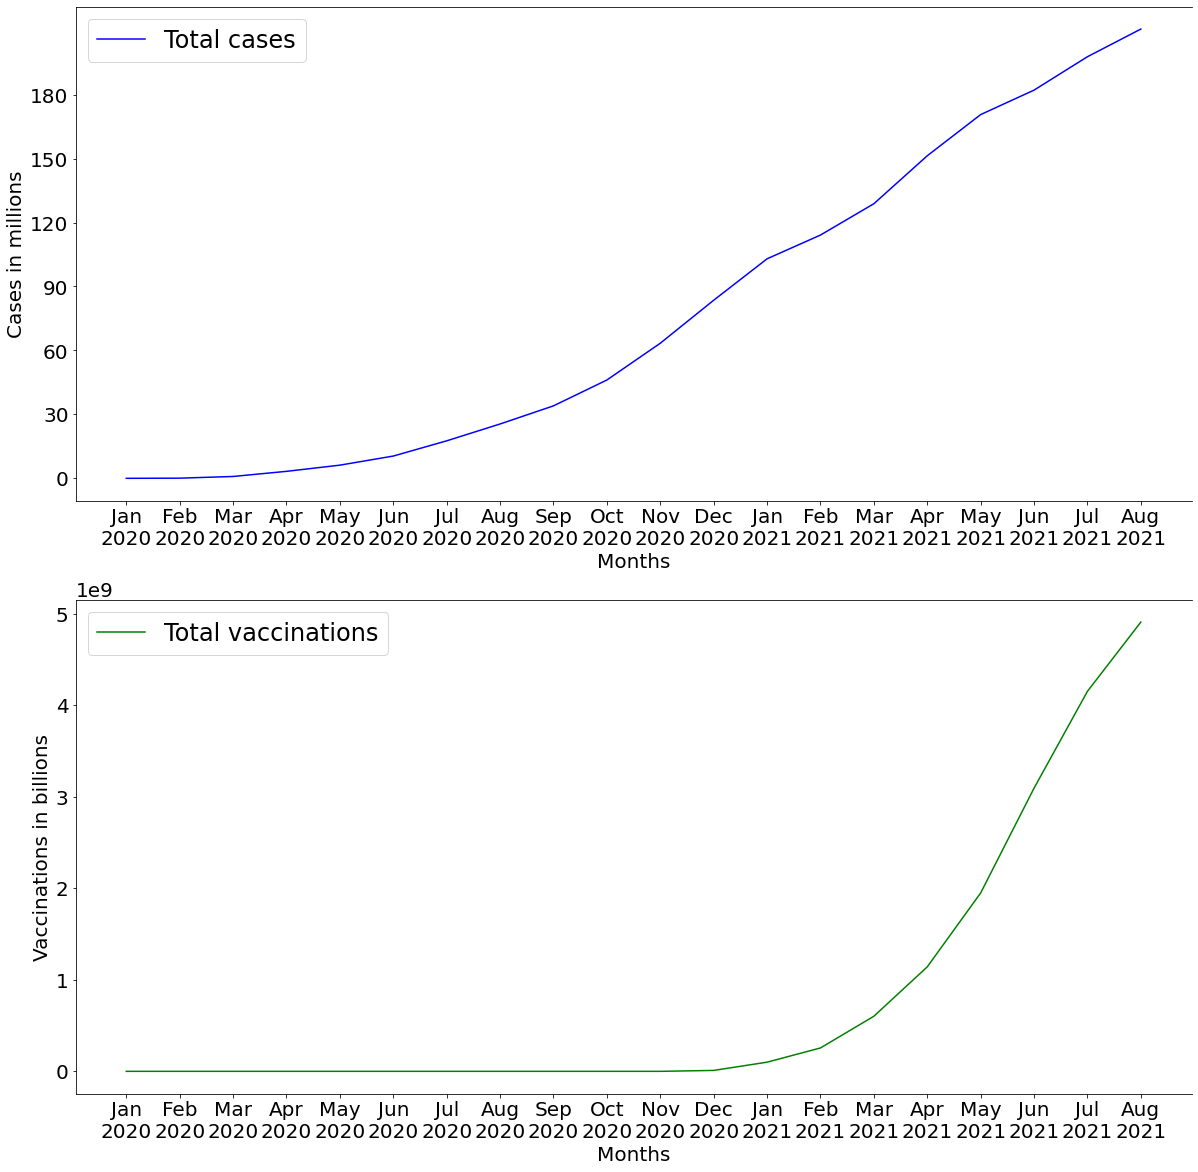

In [185]:
plt.rc("font", size=20) #Setting default fontsize to 20 from here on for following plots
fig1, ax1 = plt.subplots(2, 1)
fig1.set_figheight(20)
fig1.set_figwidth(20)

ax1[0].plot(total_cases_by_month.index, total_cases_by_month.values, label="Total cases", color="blue")
ax1[1].plot(total_vacs_by_month.index, total_vacs_by_month.values, label="Total vaccinations", color="green")

ax1[0].set_yticks(range(0, int(210e6), int(30e6)))
ax1[0].set_yticklabels([0, 30, 60, 90, 120, 150, 180])


#Loop through each subplot and repeat the same action
for i in range(2):
    ax1[i].legend(fontsize=24)
    ax1[i].set_xlabel("Months")
    
ax1[0].set_ylabel("Cases in millions")
ax1[1].set_ylabel("Vaccinations in billions")



Text(0, 0.5, 'Vaccinations in billions')

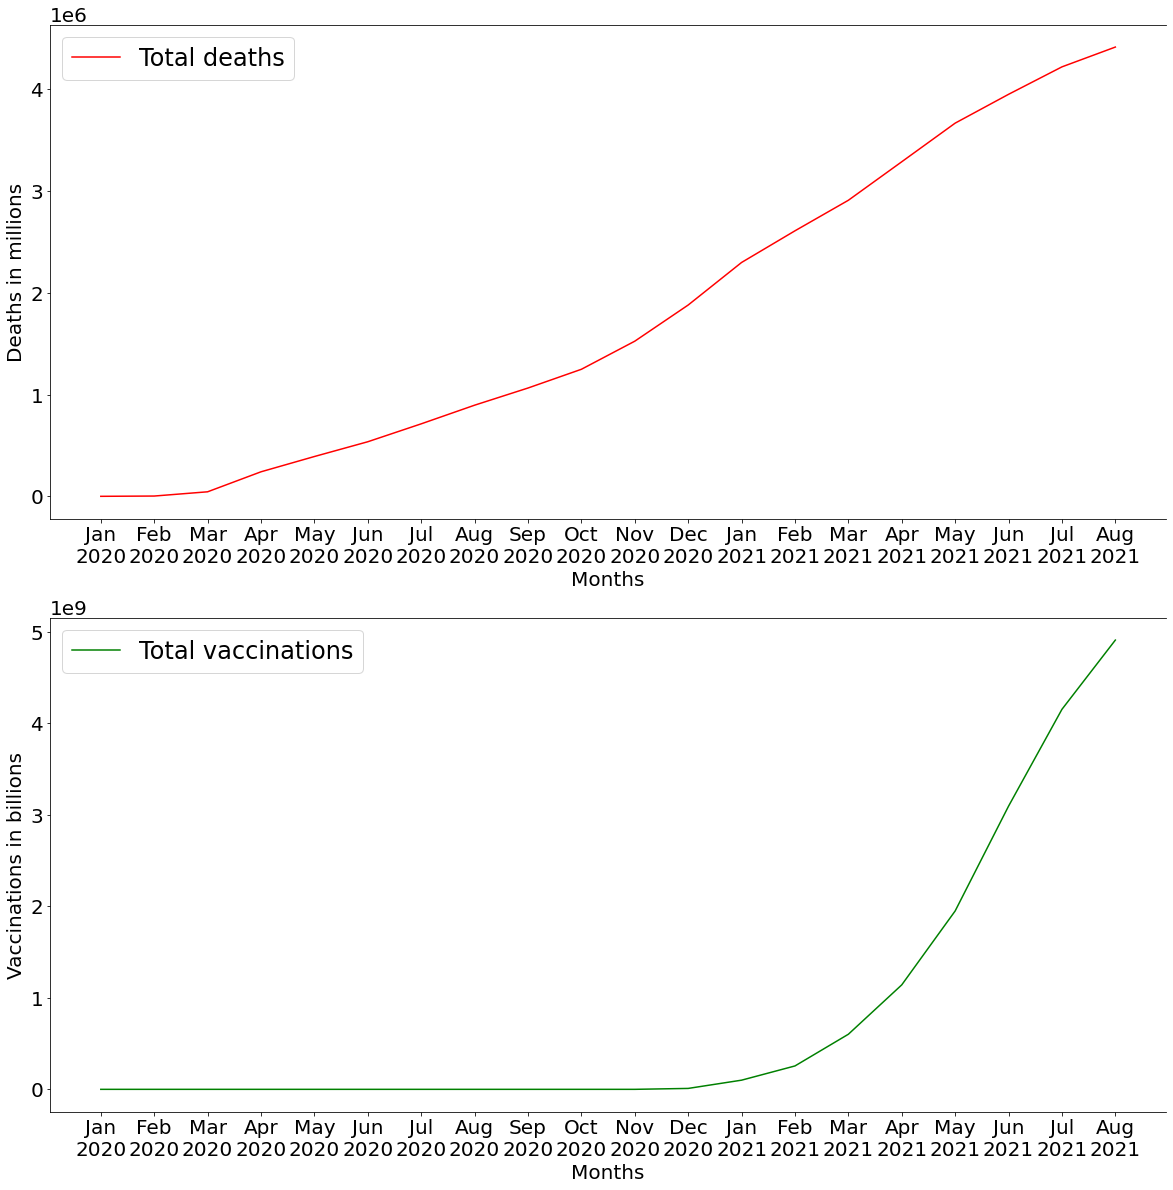

In [186]:
fig2, ax2 = plt.subplots(2, 1)
fig2.set_figheight(20)
fig2.set_figwidth(20)

ax2[0].plot(total_deaths_by_month.index, total_deaths_by_month.values, label="Total deaths", color="red")
ax2[1].plot(total_vacs_by_month.index, total_vacs_by_month.values, label="Total vaccinations", color="green")

#Loop through each subplot and repeat the same action
for i in range(2):
    ax2[i].legend(fontsize=24)
    ax2[i].set_xlabel("Months")

ax2[0].set_ylabel("Deaths in millions")
ax2[1].set_ylabel("Vaccinations in billions")


Text(0, 0.5, 'Vaccinations in billions')

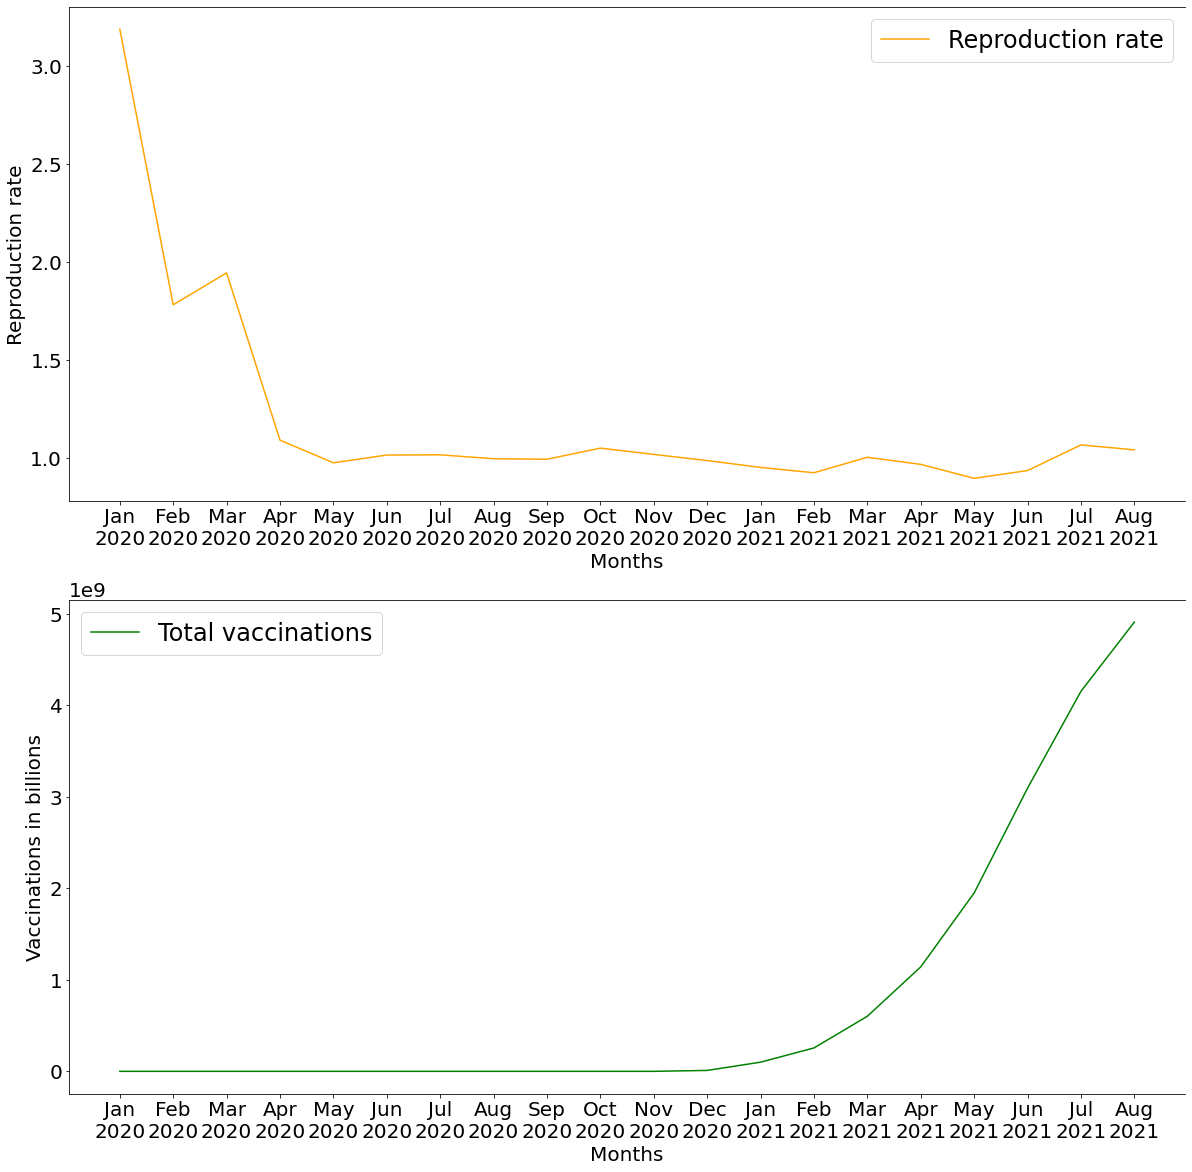

In [187]:
fig3, ax3 = plt.subplots(2, 1)
fig3.set_figheight(20)
fig3.set_figwidth(20)

ax3[0].plot(avg_r_value_months.index,avg_r_value_months.values, label="Reproduction rate", color="orange")
ax3[1].plot(total_vacs_by_month.index, total_vacs_by_month.values, label="Total vaccinations", color="green")

#Loop through each subplot and repeat the same action
for i in range(2):
    ax3[i].legend(fontsize=24)
    ax3[i].set_xlabel("Months")

ax3[0].set_ylabel("Reproduction rate")
ax3[1].set_ylabel("Vaccinations in billions")

In [330]:
avg_r_value = df.groupby("date")['reproduction_rate'].mean()
total_vacs = countries.groupby("date")['total_vaccinations'].sum()
total_cases = countries.groupby("date")['total_cases'].sum()
total_deaths = countries.groupby("date")['total_deaths'].sum()
avg_r_value

date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2021-08-16    1.042973
2021-08-17    1.043135
2021-08-18    1.043297
2021-08-19         NaN
2021-08-20         NaN
Name: reproduction_rate, Length: 598, dtype: float64

In [445]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Total Cases", "Total vaccinations"), vertical_spacing=0.15)

fig.add_trace(
    go.Scatter(x=total_cases.index, y=total_cases, line_color="red"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=total_vacs.index, y=total_vacs, line_color="blue"),
    row=2, col=1
)

fig.update_layout(height=750, showlegend=False)


In [446]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Total Deaths", "Total vaccinations"), vertical_spacing=0.15)

fig.add_trace(
    go.Scatter(x=total_deaths.index, y=total_deaths, line_color="red"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=total_vacs.index, y=total_vacs, line_color="blue"),
    row=2, col=1
)

fig.update_layout(height=750, showlegend=False)


In [447]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("R-value", "Total vaccinations"), vertical_spacing=0.15)

fig.add_trace(
    go.Scatter(x=avg_r_value.index, y=avg_r_value, line_color="green"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=total_vacs.index, y=total_vacs, line_color="blue"),
    row=2, col=1
)

fig.update_layout(height=750, showlegend=False)
